In [1]:
import pandas as pd                       #reading, writing and manipulating the data (using tables)
import numpy as np                        #Library for linear algebra and some probabiltity (raw data)

In [5]:
import tensorflow as tf                       
from tensorflow.keras.models import Sequential       #To create the sequential layer 

In [11]:
import os
os.environ['KERAS_BACKEND']='tensorflow'

In [13]:
#from keras.layers.core import Flatten, Dense, Dropout     #To create the model
#from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D  #To create the model
from keras.preprocessing import image             #used for image classification
from keras.preprocessing.image import ImageDataGenerator  #used to expand the training dataset in order to improve
                                                        #the performance and ability of the model to generalize

from keras.layers import Dense, Conv2D, MaxPool2D , Flatten, Dropout
from tensorflow.keras.optimizers import SGD, Adam
#from keras.optimizers import SGD, Adam          #To use the optimizer
from keras.utils import np_utils 

In [15]:
os.getcwd()

'C:\\Users\\irajn'

In [17]:
os.chdir('D:\\ML-udemy\\archive')

In [18]:
os.getcwd()

'D:\\ML-udemy\\archive'

In [19]:
print('Upload the CSV file')
#uploaded = files.upload()
emotion_data = pd.read_csv('fer2013.csv')
print(emotion_data)

Upload the CSV file
       emotion                                             pixels        Usage
0            0  70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...     Training
1            0  151 150 147 155 148 133 111 140 170 174 182 15...     Training
2            2  231 212 156 164 174 138 161 173 182 200 106 38...     Training
3            4  24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...     Training
4            6  4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...     Training
...        ...                                                ...          ...
35882        6  50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...  PrivateTest
35883        3  178 174 172 173 181 188 191 194 196 199 200 20...  PrivateTest
35884        0  17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...  PrivateTest
35885        3  30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...  PrivateTest
35886        2  19 13 14 12 13 16 21 33 50 57 71 84 97 108 122...  PrivateTest

[35887 rows x 3 columns]


In [31]:
emotion_data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [ ]:
emotion_data[11626]

In [ ]:
print(emotion_data['Usage'].nunique())
print(emotion_data['Usage'].unique())
print(emotion_data.shape)

print(emotion_data['emotion'].nunique())
print(emotion_data['emotion'].unique())

#see individual data clearly
#print(emotion_data['pixels'][1])

In [44]:
#---------------------- Spliting the DataSet------------------------------------
X_train = []      #train pixels
y_train = []      #train labels
X_test = []       #test pixels
y_test = []       #test label
for index, row in emotion_data.iterrows():    #iterate on each row and store it
    k = row['pixels'].split(" ")       #list of pixels, each pixel is an element
    try:
      if row['Usage'] == 'Training':    
          X_train.append(np.array(k,'float32'))    #The desired data-type for the array is 
          y_train.append(row['emotion'])
      elif row['Usage'] == 'PublicTest':
          X_test.append(np.array(k,'float32'))
          y_test.append(row['emotion'])
    except:
      print(f"error occured at index :{index} and row:{row}")




print(X_test)
print(type(X_test))


print(y_train)
print(type(y_train))

[array([254., 254., 254., ...,  42., 129., 180.], dtype=float32), array([156., 184., 198., ..., 172., 167., 161.], dtype=float32), array([ 69., 118.,  61., ...,  88.,  87.,  90.], dtype=float32), array([205., 203., 236., ...,  43.,  82.,  86.], dtype=float32), array([87., 79., 74., ..., 41., 34., 32.], dtype=float32), array([235., 233., 223., ...,  33.,  17.,  19.], dtype=float32), array([ 71.,  70., 104., ..., 127., 105., 108.], dtype=float32), array([176., 177., 170., ..., 130., 144., 141.], dtype=float32), array([255., 255., 255., ..., 255., 255., 255.], dtype=float32), array([126., 126., 123., ..., 130.,  97.,  78.], dtype=float32), array([180., 175., 169., ...,  32.,  32.,  33.], dtype=float32), array([ 88.,  46.,  35., ..., 229., 228., 227.], dtype=float32), array([121., 112.,  64., ...,  81.,  83.,  85.], dtype=float32), array([165., 203., 211., ..., 189., 178., 167.], dtype=float32), array([22., 28., 27., ..., 90., 81., 92.], dtype=float32), array([132., 154., 165., ...,  70., 

In [45]:
#--------------------Convert Lists to Numpy arrays------------------------------
X_train = np.array(X_train, 'float32')
y_train = np.array(y_train, 'float32')
X_test = np.array(X_test,'float32')
y_test = np.array(y_test,'float32')

#-----------------------Reshape Pixels arrays---------------------------------
#normalizing data between o and 1  
X_train -= np.mean(X_train, axis=0)  
X_train /= np.std(X_train, axis=0)  

X_test -= np.mean(X_test, axis=0)  
X_test /= np.std(X_test, axis=0) 

#reshape the numpy array to be passed to the model
X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)   
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

print(X_test.shape)
print(type(X_test))
print(X_train.shape)

#------------------Convert Labels array to categorial ones---------------------
#y_train= tf.keras.utils.to_categorical(y_train, num_classes=7)
#y_test = tf.keras.utils.to_categorical(y_test, num_classes=7)

y_train= np_utils.to_categorical(y_train, num_classes=7)
y_test = np_utils.to_categorical(y_test, num_classes=7)
print(y_train)
print(y_train.shape)
print(type(y_train))

(3589, 48, 48, 1)
<class 'numpy.ndarray'>
(28709, 48, 48, 1)
[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]
(28709, 7)
<class 'numpy.ndarray'>


# Building CNN Model

In [46]:
model = Sequential()

model.add(Conv2D(input_shape=(X_train.shape[1:]),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))


model.add(Flatten())
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(7, activation='softmax'))


model.summary()      

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 12, 12, 256)       2

# Compile Model

In [47]:
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])

In [48]:
batch = 32
epoch = 30

history = model.fit(X_train,y_train,batch_size= batch,epochs= epoch,verbose=1,validation_data=(X_test, y_test),shuffle=True)

Epoch 1/30
898/898 [==============================] - 1416s 2s/step - loss: 1.7259 - accuracy: 0.2945 - val_loss: 1.5026 - val_accuracy: 0.3984
Epoch 2/30
898/898 [==============================] - 1512s 2s/step - loss: 1.4331 - accuracy: 0.4292 - val_loss: 1.3973 - val_accuracy: 0.4556
Epoch 3/30
898/898 [==============================] - 1733s 2s/step - loss: 1.2857 - accuracy: 0.4966 - val_loss: 1.2662 - val_accuracy: 0.4965
Epoch 4/30
898/898 [==============================] - 1852s 2s/step - loss: 1.1696 - accuracy: 0.5494 - val_loss: 1.2059 - val_accuracy: 0.5364
Epoch 5/30
898/898 [==============================] - 1691s 2s/step - loss: 1.0737 - accuracy: 0.5926 - val_loss: 1.1986 - val_accuracy: 0.5489
Epoch 6/30
898/898 [==============================] - 2364s 3s/step - loss: 0.9651 - accuracy: 0.6359 - val_loss: 1.1707 - val_accuracy: 0.5614
Epoch 7/30
898/898 [==============================] - 2320s 3s/step - loss: 0.8465 - accuracy: 0.6853 - val_loss: 1.1903 - val_accuracy:

KeyboardInterrupt: 

# Evaluate the Model

In [49]:
loss_and_metrics = model.evaluate(X_test,y_test)
print(loss_and_metrics)

113/113 [==============================] - 34s 302ms/step - loss: 1.4269 - accuracy: 0.5943
[1.4269331693649292, 0.5943159461021423]


# Test Model

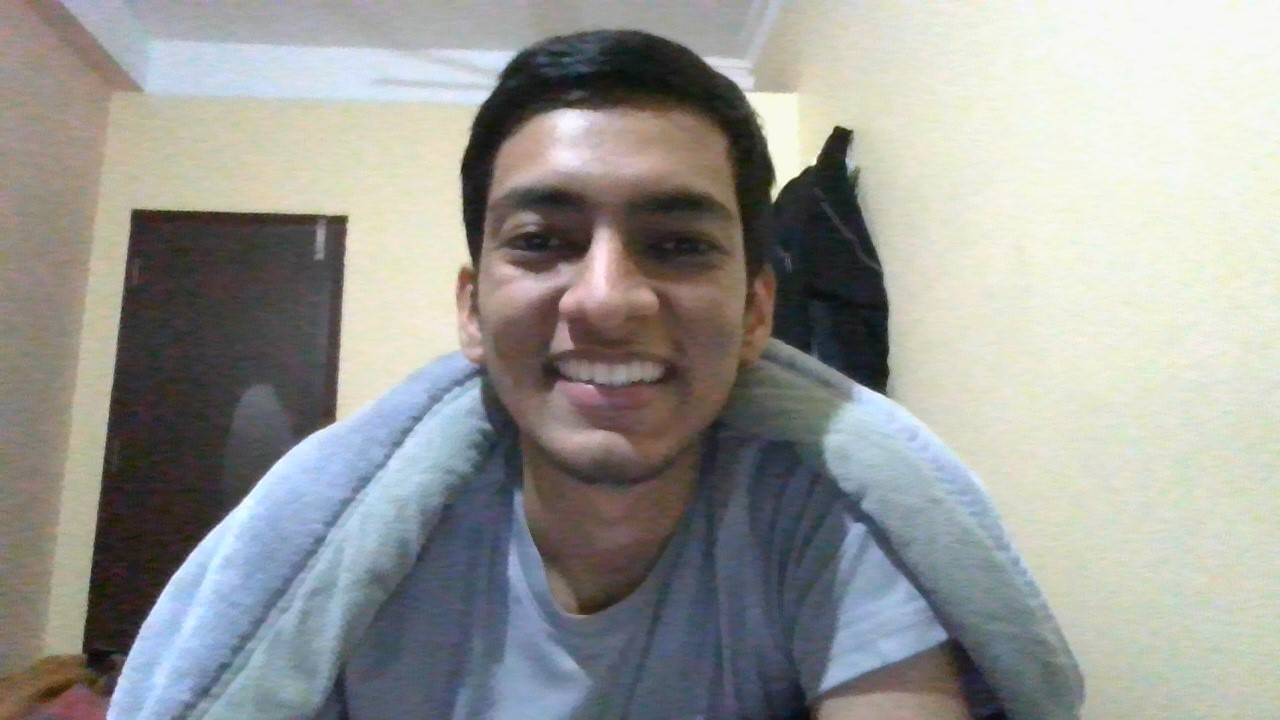



5 = surprise


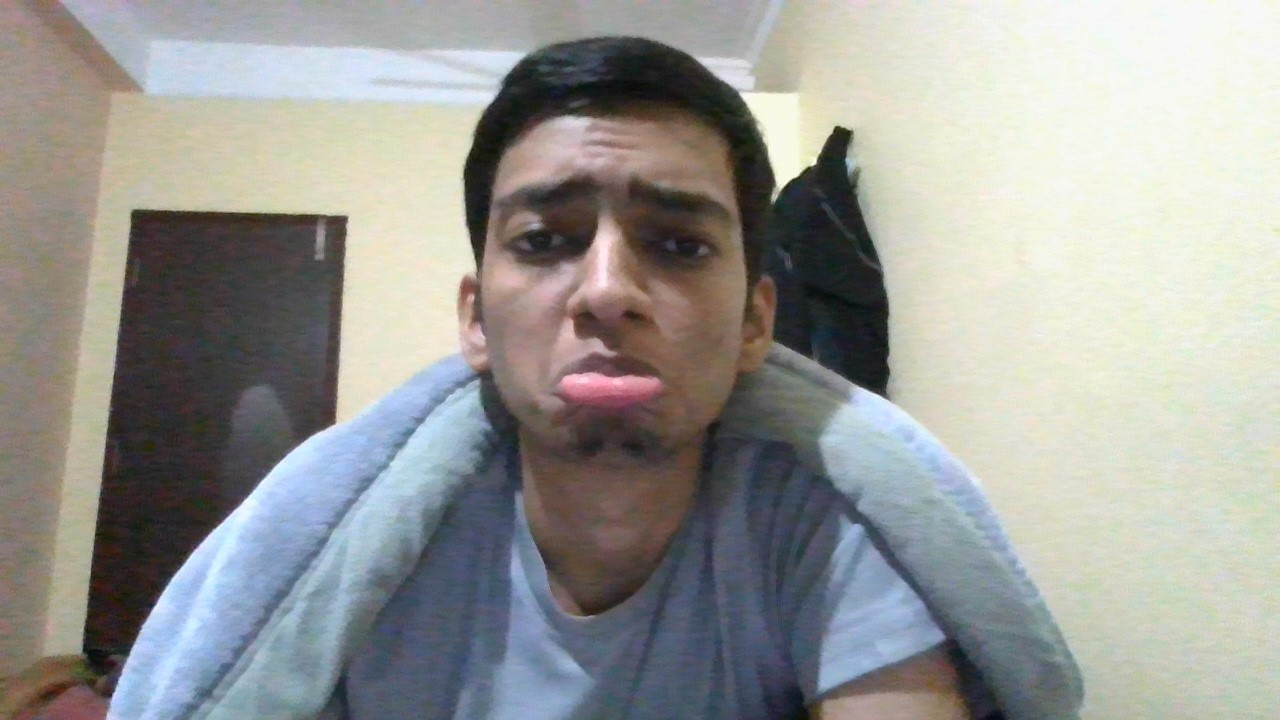



5 = surprise


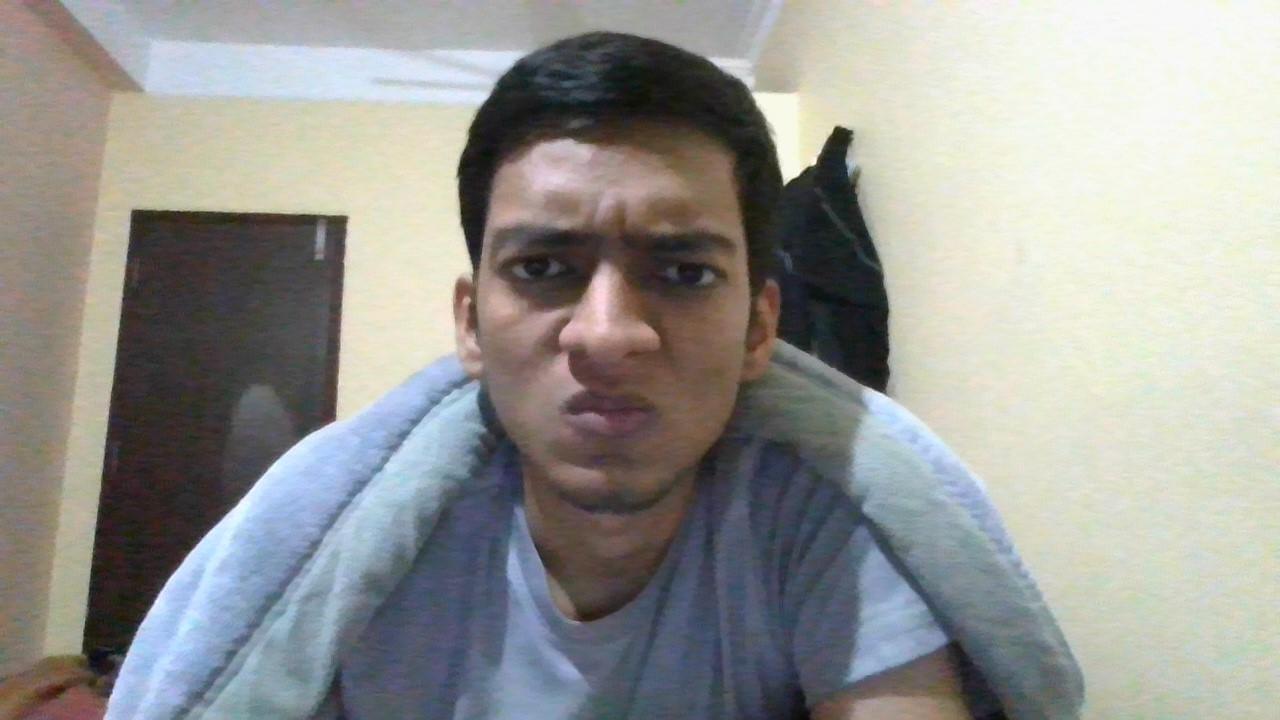



5 = surprise


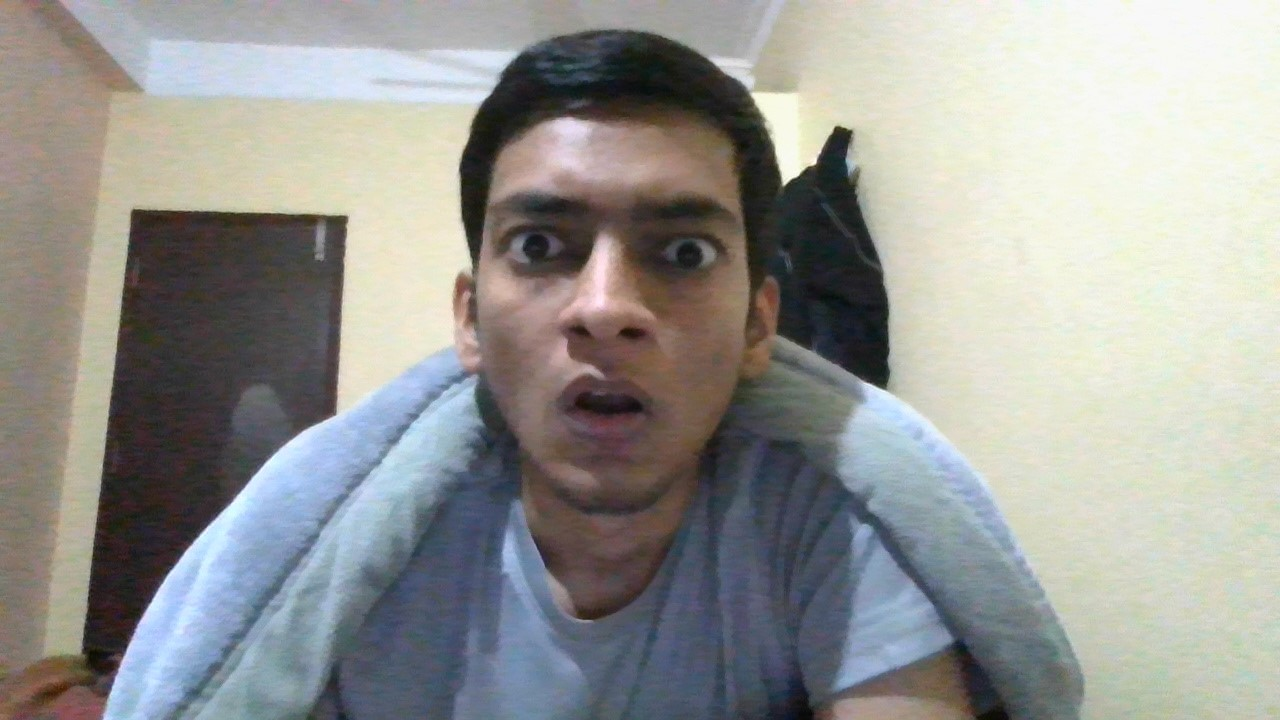



5 = surprise


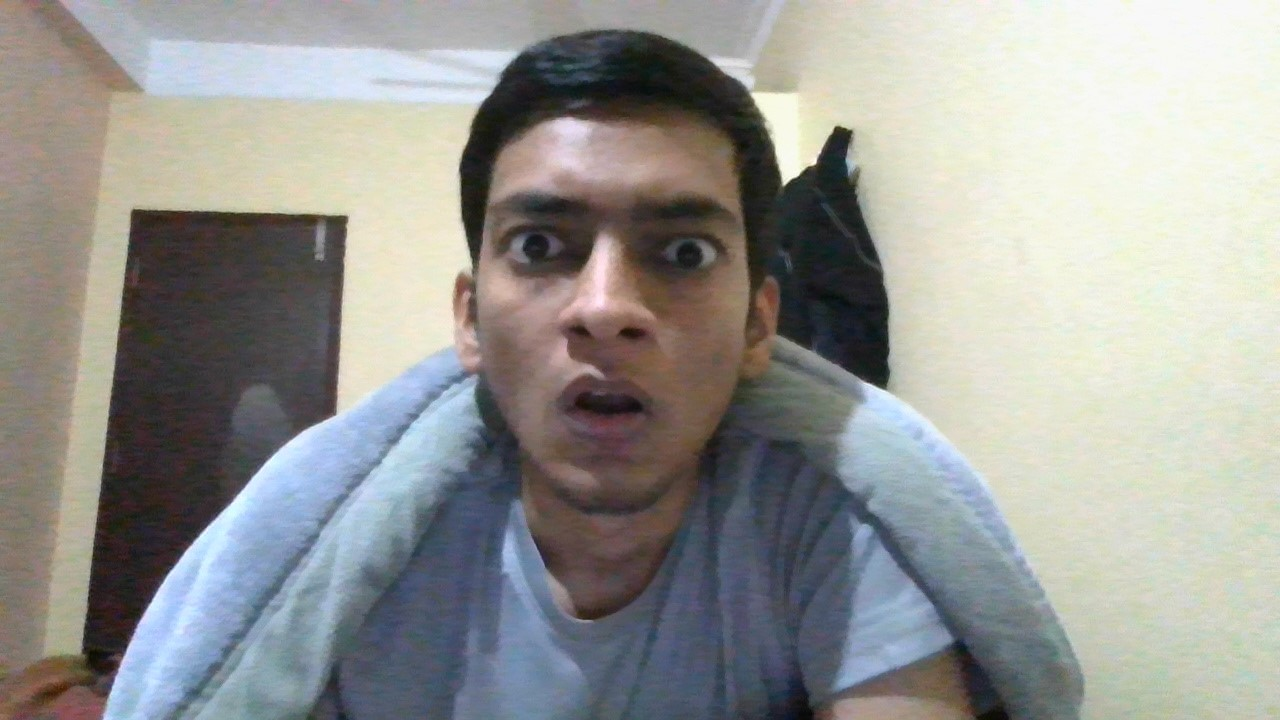



5 = surprise


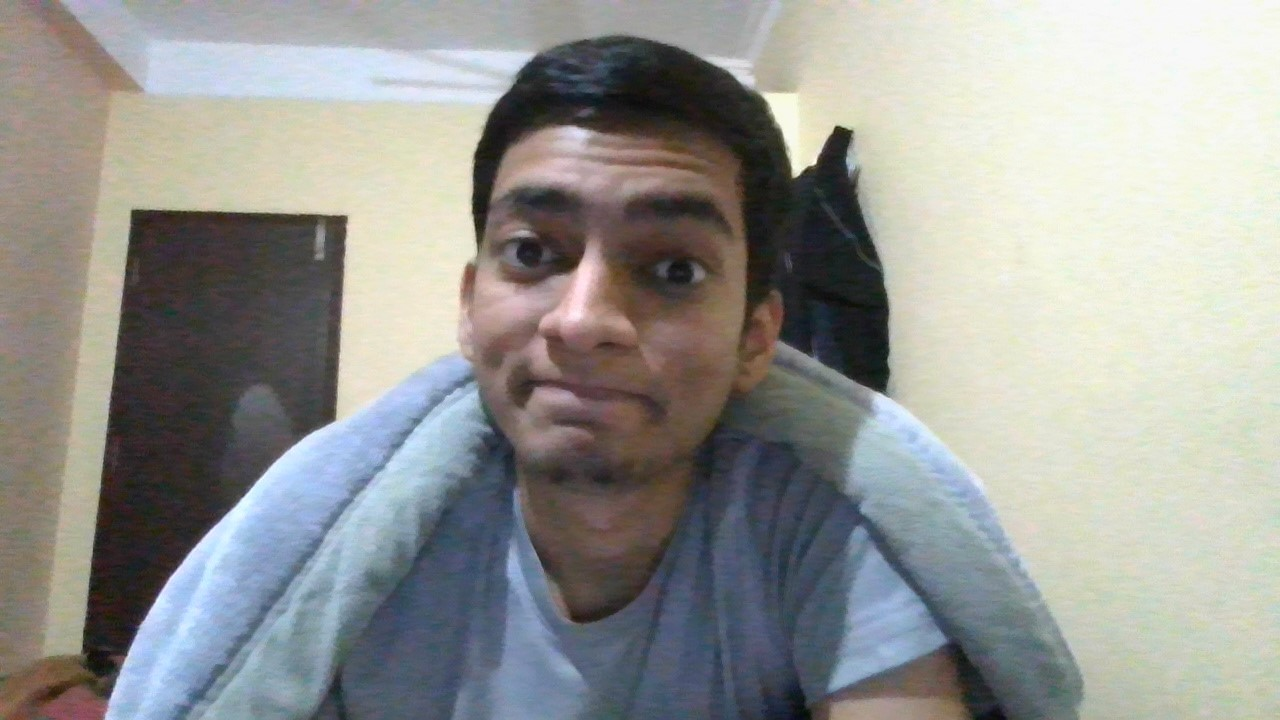



5 = surprise


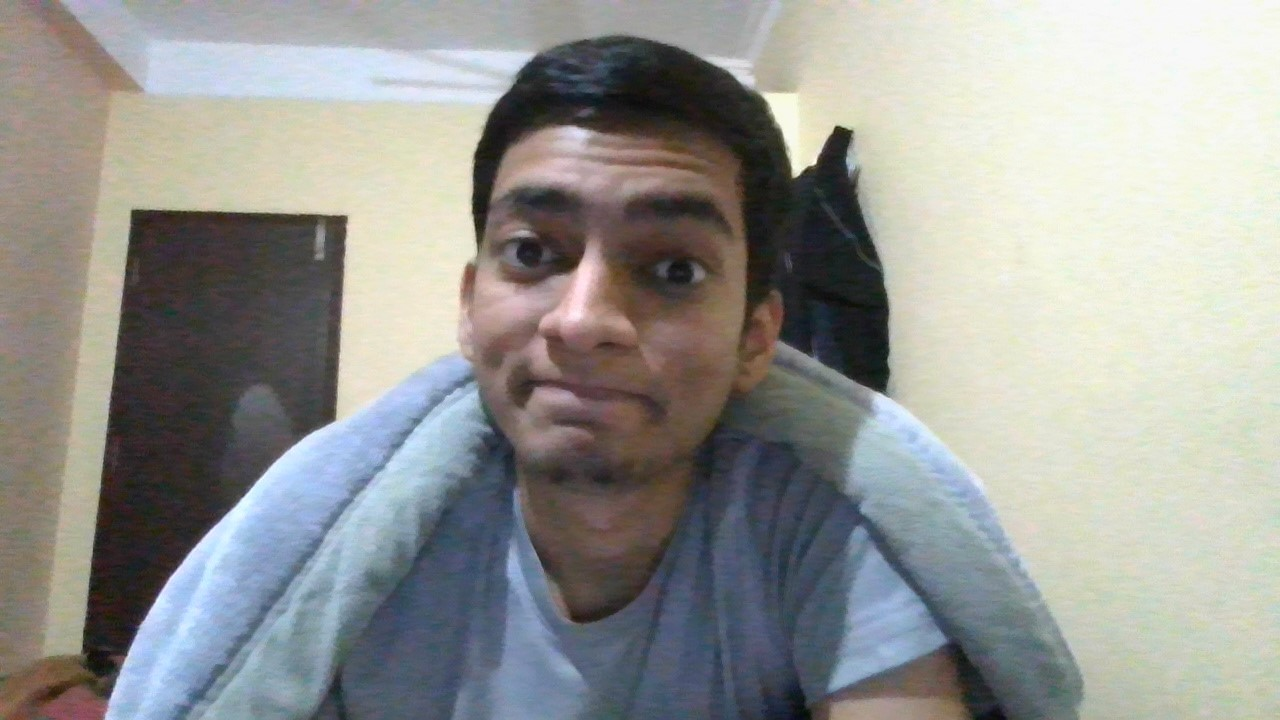



5 = surprise


In [51]:
from IPython.display import Image, display
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

TGREEN =  '\033[1;37;42m'
TRED =    '\033[1;37;41m'
TYELLOW = '\033[0;43m'

for i in range (1,7+1):
  img_directory = str(i) + '.jpeg'
  img_data = image.load_img(img_directory, target_size = (48, 48))   #load the image from the directory
  img_data = image.img_to_array(img_data)                            #convert the image to a Numpy array
  img_data = tf.image.rgb_to_grayscale(img_data)

  #print(img_data.shape)
  #img_data = np.array(img_data, 'float32')
  #img_data.resize(48,48,1)
  #print(img_data.shape)
  img_data = np.expand_dims(img_data, axis = 0)                     #expands the array by inserting a new axis at the specified position.
  #print(img_data.shape)

  classify = model.predict(img_data)
  display(Image(img_directory,width= 150, height=150))
  print("\n")
  max_index = np.argmax(classify[0])
  emotion_detection = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
  emotion_prediction = emotion_detection[max_index]  
  
  if(max_index == 3 or max_index == 5):
    print(TGREEN + str(max_index) + ' = ' +  emotion_prediction)
  elif(max_index == 4 or max_index == 2 or max_index == 0):
    print(TRED + str(max_index) + ' = ' +  emotion_prediction)
  else:
    print(TYELLOW + str(max_index) + ' = ' +  emotion_prediction)